# HIV-Verlauf in Europa in den letzten 35 Jahren

## Struktur
1. Fragestellungen und Rohdaten
2. Daten formatieren
3. Statistik der Rohdaten und Interpretation
4. Fragestellungen beantworten



---

## Fragestellungen und Rohdaten
### Titel: 
- HIV-Verlauf in Europa den letzten 35 Jahren
### Fragestellung:
1. Wo in Europa waren die meisten Menschen betroffen und warum? 
2. Ab wann konnten die Ansteckungen reduziert werden und wie?
### Datenquelle:
- https://ourworldindata.org





### Daten beschaffen und laden

In [ ]:

!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Alle Daten gefiltert auf Europäische Länder

In [4]:
import pandas as pd
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]
df = df[df["Entity"].isin(europe)]
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]
df

,Entity,Code,Year,HIV prevalence - Sex: total - Age: 15-49 - Central estimate
35,Albania,ALB,1990,0.00045
36,Albania,ALB,1991,0.00063
37,Albania,ALB,1992,0.00087
38,Albania,ALB,1993,0.00118
39,Albania,ALB,1994,0.00159
...,...,...,...,...
5608,Switzerland,CHE,2020,0.19045
5609,Switzerland,CHE,2021,0.18479
5610,Switzerland,CHE,2022,0.17943
5611,Switzerland,CHE,2023,0.17473


----

## 2. Daten formatieren
- Daten werden eingeschränkt in die grössten europäischen Länder, wobei 11 davon verwendet werden, welche Daten entahlten
- Für eine übersichtlichere Darstellung werden die Daten als Pivot-Format formatiert.
- Daten von folgenden Länder sind entahlten: Portugal, Spanien, Frankreich, Italien, Schweiz, Belgien, Niederlande, Deutschland, Griechenland, Dänemark, Norwegen
1. Eingebaute Python-Typen:	list, str, int, bool, ValueError
2. Pandas-Typen: DataFrame, Series, Index
3. NumPy-Typen: (intern)	numpy.int64, numpy.float64, numpy.bool_

In [5]:
import pandas as pd

data = {
    "Bereich": [
        "Eingebaute Python-Typen",
        "Pandas-Typen",
        "NumPy-Typen (intern)"
    ],
    "Typen": [
        "list, str, int, bool, ValueError",
        "DataFrame, Series, Index",
        "numpy.int64, numpy.float64, numpy.bool_"
    ]
}
summary_df = pd.DataFrame(data)
print("Übersicht verwendeter Datentypen:")
display(summary_df)



Übersicht verwendeter Datentypen:


,Bereich,Typen
0,Eingebaute Python-Typen,"list, str, int, bool, ValueError"
1,Pandas-Typen,"DataFrame, Series, Index"
2,NumPy-Typen (intern),"numpy.int64, numpy.float64, numpy.bool_"


In [122]:
import pandas as pd
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]
df = df[df["Entity"].isin(selected_countries)]
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]
pivot_table = df.pivot(index="Year", columns="Entity", values=hiv_col)
pivot_table = pivot_table.sort_index(axis=0).sort_index(axis=1)
print(pivot_table)


Entity  Belgium  Denmark   France  Germany   Greece    Italy  Netherlands  \
Year                                                                        
1990    0.05354  0.08188  0.12917      NaN  0.01936  0.16515      0.08114   
1991    0.05470  0.08689  0.13886      NaN  0.02414  0.17048      0.08079   
1992    0.05625  0.09109  0.14743      NaN  0.02938  0.17430      0.08023   
1993    0.05800  0.09444  0.15493      NaN  0.03486  0.17685      0.07986   
1994    0.06011  0.09708  0.16141      NaN  0.04031  0.17837      0.07983   
1995    0.06389  0.09905  0.16686      NaN  0.04667  0.17903      0.07997   
1996    0.06941  0.10044  0.17141      NaN  0.05304  0.17973      0.08345   
1997    0.07574  0.10549  0.17819      NaN  0.05885  0.18242      0.08972   
1998    0.08254  0.11194  0.18789      NaN  0.06394  0.18779      0.09676   
1999    0.08963  0.11784  0.19794      NaN  0.06839  0.19502      0.10419   
2000    0.09680  0.12301  0.20824      NaN  0.07250  0.20319      0.11104   

### Durchschnitt der Infektionen über die 35 Jahre pro Land
 Es werden numerisch, sowie grafisch die Durchschnitte der HIV-Prävalenz der Länder über die letzten 35 Jahren dargestellt.

In [123]:
import pandas as pd


df = df[df["Entity"].isin(selected_countries)]

hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

avg_df = df.groupby("Entity")[hiv_col].mean().reset_index()
avg_df = avg_df.rename(columns={hiv_col: "Durchschnitt HIV-Infektion (%)"})

avg_df = avg_df.sort_values("Durchschnitt HIV-Infektion (%)", ascending=False)

print("Durchschnittliche HIV-Infektion pro Land (letzte 35 Jahre):")
print(avg_df.to_string(index=False))


Durchschnittliche HIV-Infektion pro Land (letzte 35 Jahre):
     Entity  Durchschnitt HIV-Infektion (%)
   Portugal                        0.523211
      Spain                        0.412642
     France                        0.235167
      Italy                        0.231945
Switzerland                        0.215693
    Belgium                        0.141056
Netherlands                        0.137890
    Germany                        0.134262
     Greece                        0.133498
    Denmark                        0.110654
     Norway                        0.080888


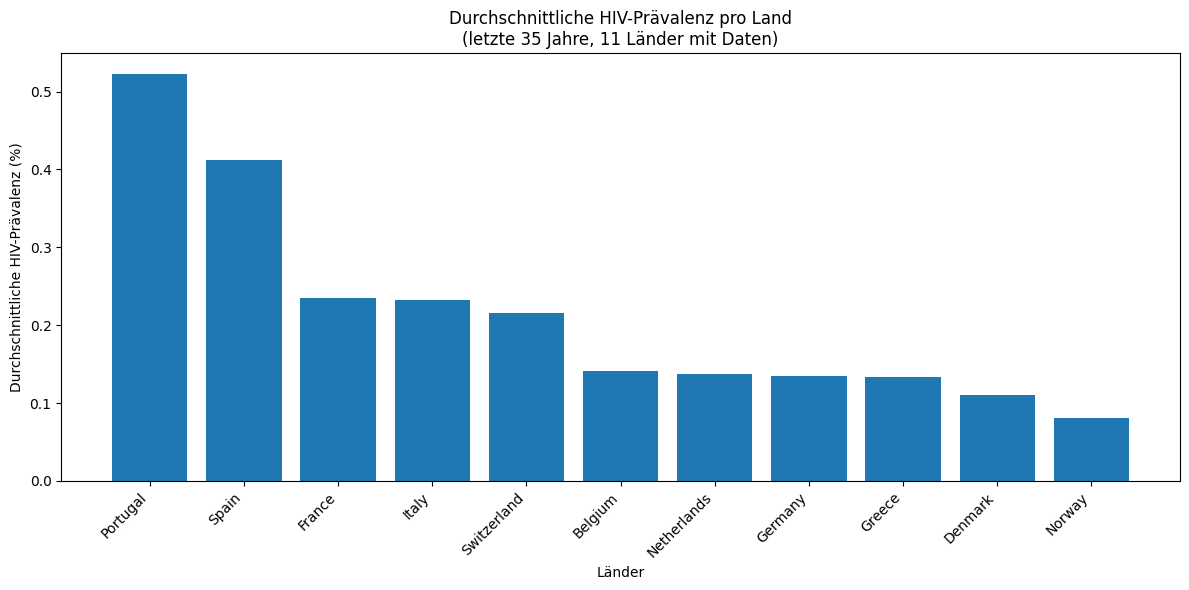

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Länder filtern
df = df[df["Entity"].isin(selected_countries)]

# Letzte 35 Jahre
df = df[df["Year"] >= df["Year"].max() - 35]

# HIV-Spalte bestimmen
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]

# Durchschnitt pro Land berechnen
mean_table = df.groupby("Entity")[hiv_col].mean()

# Nur 11 Länder mit den meisten Daten auswählen
top_11 = mean_table.sort_values(ascending=False).head(11)

# Säulendiagramm
plt.figure(figsize=(12, 6))
plt.bar(top_11.index, top_11.values)

# Achsen & Titel
plt.xlabel("Länder")
plt.ylabel("Durchschnittliche HIV-Prävalenz (%)")
plt.title("Durchschnittliche HIV-Prävalenz pro Land\n(letzte 35 Jahre, 11 Länder mit Daten)")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In der Tabelle ist die durchschnittliche HIV-Prävalenz der einzelnen Bevölkerungen über einen Zeitraum von 35 Jahren dargestellt (in %). Die Prävalenz beschreibt den Anteil der Bevölkerung, der im betrachteten Zeitraum mit HIV lebt, und stellt somit keinen Indikator für die Anzahl der jährlichen Neuinfektionen dar. Der zugehörige Graph visualisiert diese durchschnittlichen Prävalenzwerte.
Innerhalb der betrachteten europäischen Länder weist Portugal mit 0.54 % die höchste durchschnittliche HIV-Prävalenz auf. Norwegen verzeichnet mit 0.08 % den niedrigsten Wert, während die Schweiz eine mittlere Prävalenz von 0.21 % aufweist. Obwohl die Unterschiede zwischen den Ländern statistisch relevant sind, bewegen sie sich insgesamt in einem engen Bereich von Zehntelprozenten, was für den europäischen Kontext typisch ist.
 
Einflussfaktoren generell (über alle Länder):
 
Medizinische Faktoren:
Zugang zu HIV-Tests
Zugang zu antiretroviraler Therapie
Qualität & Infrastruktur des Gesundheitssystems
Präventionsprogramme (Schutz beim Sex, PrEP, Spritzentausch)
 
Soziale Faktoren:
Drogenkonsum (injizierende Drogen)
Stigmatisierung von HIV, Homosexualität, Sexarbeit
Bildungsniveau und Aufklärung
Migration & Mobilität
 
 
 
Politische und Wirtschaftliche Faktoren:
Stabilität des Staates
Finanzierung /Priorität des Gesundheitssystems
Gesetzgebung
 
 


----

## 3. Statistik der Rohdaten und Interpretation

- Variable HIV-Infektion (%): kontinuierlich, weil sie theoretisch jeden Wert zwischen 0 und 100 annehmen kann.
- Andere Variablen: Entity (Land): diskret, 17 einzigartige Klassen, Year: diskret, in den letzten 35 Jahren
- Anzahl Datenpunkte für HIV-Infektion: 11 Länder haben Daten

### Grafische Darstellung für die Länder mit den meisten Infektionen

Portugal – HIV-Prävalenz (letzte 35 Jahre)
- Anfang der 1990er Jahre lag die Prävalenz bei etwa 0,24 %.
- Sie stieg kontinuierlich an und erreichte ihren Höchstwert um 2008–2010 bei etwa 0,61 %.
- Danach sinkt die Prävalenz langsam, bis sie 2024 auf ca. 0,475 % gefallen ist.

Spanien - HIV-Prävalenz (letzte 35 Jahre)
- Peak in den 1990er-Jahren: Die HIV-Prävalenz stieg bis Mitte der 1990er auf ca. 0,47 % und blieb danach kurz stabil.
- Langsamer Rückgang ab 2000: Ab etwa 2000 begann die Prävalenz kontinuierlich zu sinken.
- Deutlicher Rückgang seit 2010: In den letzten 10–15 Jahren sank die Prävalenz von über 0,4 % auf unter 0,3 %.

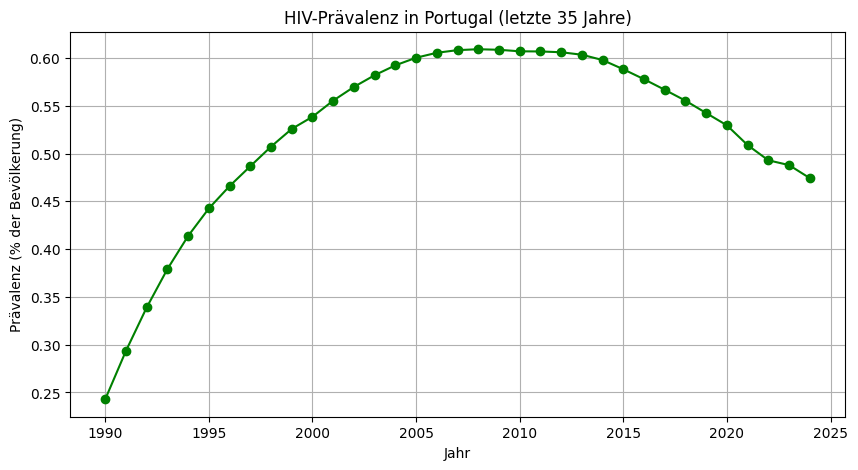

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]
df = df[df["Entity"].isin(europe)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

df_portugal = df[df["Entity"] == "Portugal"]

hiv_cols = [col for col in df_portugal.columns if "hiv" in col.lower()]
if len(hiv_cols) != 1:
    raise ValueError(f"HIV-Spalte nicht eindeutig: {hiv_cols}")
hiv_col = hiv_cols[0]

plt.figure(figsize=(10,5))
plt.plot(df_portugal["Year"], df_portugal[hiv_col], marker='o', color='green')
plt.title("HIV-Prävalenz in Portugal (letzte 35 Jahre)")
plt.xlabel("Jahr")
plt.ylabel("Prävalenz (% der Bevölkerung)")
plt.grid(True)
plt.show()


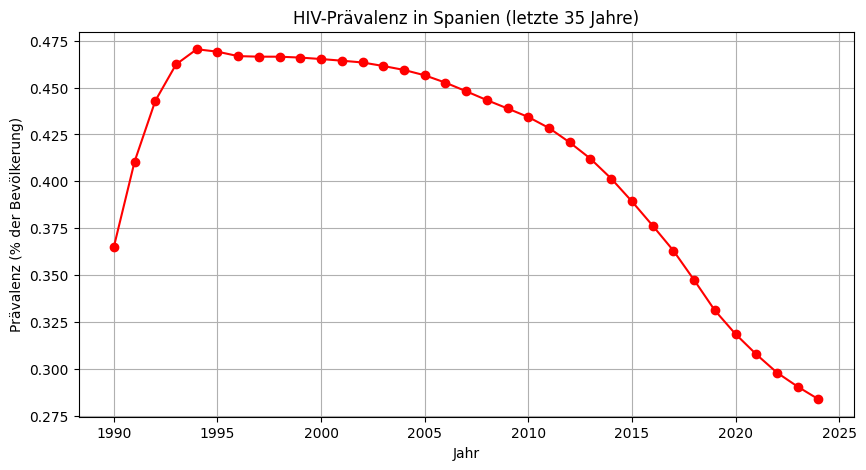

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]
df = df[df["Entity"].isin(europe)]
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]
df_spain = df[df["Entity"] == "Spain"]
hiv_cols = [col for col in df_spain.columns if "hiv" in col.lower()]
if len(hiv_cols) != 1:
    raise ValueError(f"HIV-Spalte nicht eindeutig: {hiv_cols}")
hiv_col = hiv_cols[0]
plt.figure(figsize=(10,5))
plt.plot(df_spain["Year"], df_spain[hiv_col], marker='o', color='red')
plt.title("HIV-Prävalenz in Spanien (letzte 35 Jahre)")
plt.xlabel("Jahr")
plt.ylabel("Prävalenz (% der Bevölkerung)")
plt.grid(True)
plt.show()



Portugal und Spanien sind geografisch benachbarte Länder und zeigen sowohl vergleichbare HIV-Prävalenzwerte als auch ähnliche erklärende Einflussfaktoren. Beide Länder gehören zu den beliebtesten Tourismusdestinationen Europas, was mit einer erhöhten internationalen Mobilität einhergeht. Diese erhöhte Mobilität kann die Wahrscheinlichkeit von HIV-Übertragungen erhöhen, insbesondere durch temporäre Aufenthalte und sexuelle Kontakte mit Personen aus Regionen mit höherer HIV-Prävalenz.

Ein weiterer zentraler Erklärungsansatz liegt in der historischen Entwicklung der HIV-Epidemie in beiden Ländern. In den 1980er- und 1990er-Jahren kam es sowohl in Portugal als auch vorallem in Spanien zu ausgeprägten Heroin-Epidemien. Der verbreitete injizierende Drogenkonsum führte in dieser Zeit zu vermehrten HIV-Übertragungen durch gemeinsam genutzte Injektionsnadeln. Diese historischen Infektionswellen tragen bis heute zu einer erhöhten durchschnittlichen HIV-Prävalenz bei, da viele betroffene Personen dank moderner antiretroviraler Therapien langfristig mit der Infektion leben.

 

### Grafische Darstellung des am wenigsten betroffenen Land Norwegen


Norwegen - HIV-Prävalenz (letzte 35 Jahren)
- Anfang der 1990er Jahre lag die Prävalenz bei etwa 0,036 % – also sehr niedrig.
- Sie stieg allmählich bis zu einem Höchstwert von ca. 0,112 % um 2013–2015.
- Danach beginnt ein leichter Rückgang, bis 2024 auf etwa 0,087 %.

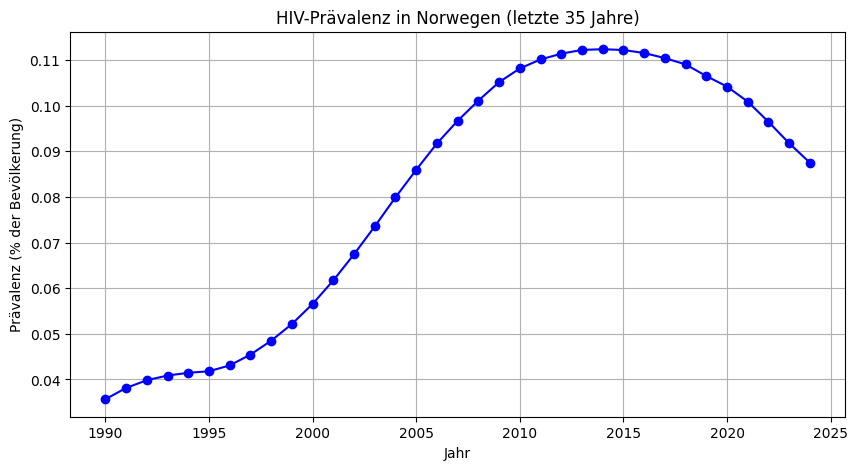

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]
df = df[df["Entity"].isin(europe)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

df_norway = df[df["Entity"] == "Norway"]

hiv_cols = [col for col in df_norway.columns if "hiv" in col.lower()]
if len(hiv_cols) != 1:
    raise ValueError(f"HIV-Spalte nicht eindeutig: {hiv_cols}")
hiv_col = hiv_cols[0]

plt.figure(figsize=(10,5))
plt.plot(df_norway["Year"], df_norway[hiv_col], marker='o', color='blue')
plt.title("HIV-Prävalenz in Norwegen (letzte 35 Jahre)")
plt.xlabel("Jahr")
plt.ylabel("Prävalenz (% der Bevölkerung)")
plt.grid(True)
plt.show()


Norwegen weist mit 0.08 % die niedrigste HIV-Prävalenz der selektierten Länder auf. Ein zentraler Faktor hierfür ist das gut ausgebaute und flächendeckend zugängliche Gesundheitssystem. HIV-Diagnostik, Präventionsangebote und therapeutische Massnahmen sind in Norwegen frühzeitig verfügbar und niederschwellig zugänglich. Eine frühe Detektion und rasche Einleitung einer antiretroviralen Therapie reduzieren sowohl individuelle Krankheitsfolgen als auch das Risiko weiterer Übertragungen, was langfristig zu einer Stabilisierung auf niedrigem Prävalenzniveau beiträgt.

Darüber hinaus spielen umfassende und systematische Sexualaufklärung sowie eine gesundheitsorientierte Drogenpolitik eine wichtige Rolle. Staatlich unterstützte Programme wie der regelmässige Spritzentausch, der über spezialisierte Sucht- und Gesundheitszentren organisiert wird, tragen wesentlich zur Prävention von HIV-Übertragungen unter injizierenden Drogenkonsumierenden bei. Insgesamt lässt sich die niedrige HIV-Prävalenz in Norwegen als Ergebnis einer frühzeitigen, präventionsorientierten und sozial integrierten Gesundheitspolitik interpretieren.

### Boxplot-Darstellung

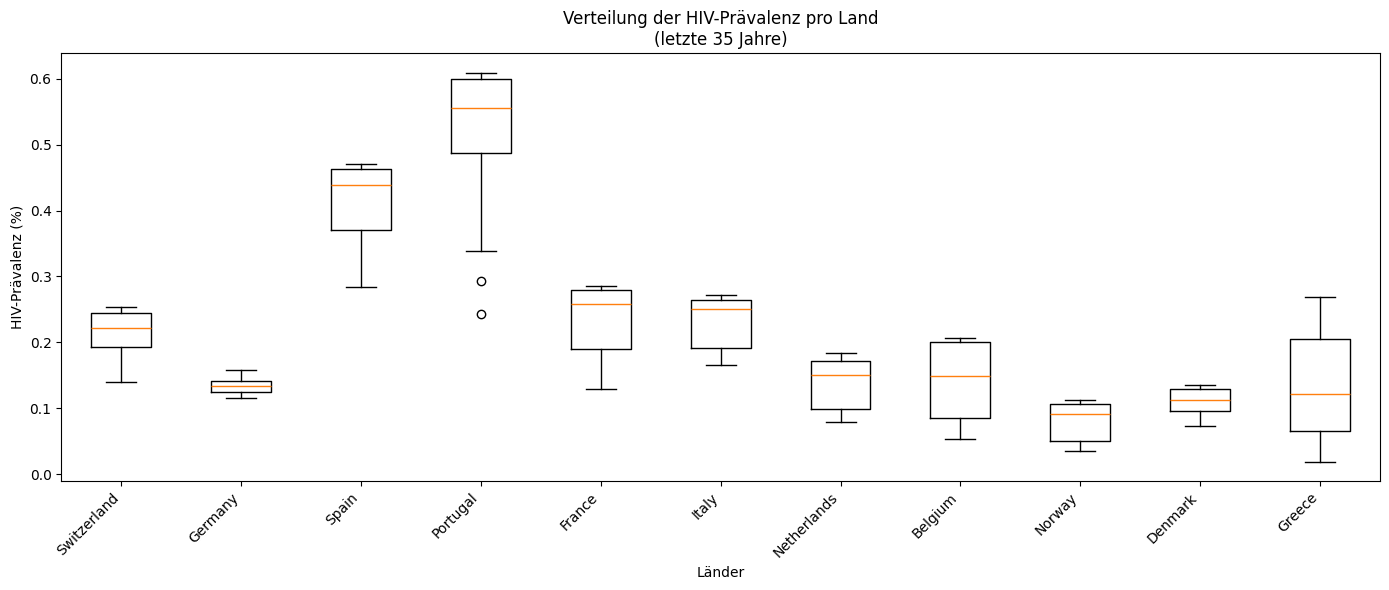

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "Netherlands", "Belgium", "Norway", "Denmark", "Greece"
]
df = df[df["Entity"].isin(selected_countries)]
df = df[df["Year"] >= df["Year"].max() - 35]
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]
boxplot_data = [
    df[df["Entity"] == country][hiv_col].dropna()
    for country in selected_countries
]
plt.figure(figsize=(14, 6))
plt.boxplot(boxplot_data, tick_labels=selected_countries, showfliers=True)
plt.xlabel("Länder")
plt.ylabel("HIV-Prävalenz (%)")
plt.title("Verteilung der HIV-Prävalenz pro Land\n(letzte 35 Jahre)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Die Grafik zeigt die Verteilung der HIV-Prävalenz für die jeweiligen Länder über den betrachteten Zeitraum. Der Median ist durch die orangefarbene Linie innerhalb der Box dargestellt. Der Interquartilsabstand (mittlere 50 % der Werte) wird durch die Box repräsentiert, während Ausreißer als einzelne Kreise visualisiert sind.

Länder, deren Boxplots einen größeren Wertebereich aufweisen – beispielsweise Portugal und Spanien – zeigen eine höhere Streuung der HIV-Prävalenz. Dies deutet auf stärkere zeitliche Schwankungen der Prävalenzwerte in Abhängigkeit vom jeweiligen Jahr hin.

Boxplots mit einem kleinen Wertebereich weisen hingegen auf eine geringe Streuung der Daten hin. In diesen Fällen kann von einer relativ stabilen HIV-Prävalenz über die Jahre ausgegangen werden. Deutschland zeigt beispielsweise einen vergleichsweise stabilen Boxplot. Dabei ist zu berücksichtigen, dass für Deutschland weniger Datenpunkte vorliegen (nur 12 Beobachtungen), was die Aussagekraft der Streuung einschränken kann.
 
Auffälligkeiten:
Länder mit höherer Prävalenz, zeigen oft auch grössere zeitliche Schwankungen.
Länder mit niedriger Prävalenz sind stabiler.

### Zeitverlauf der Länder

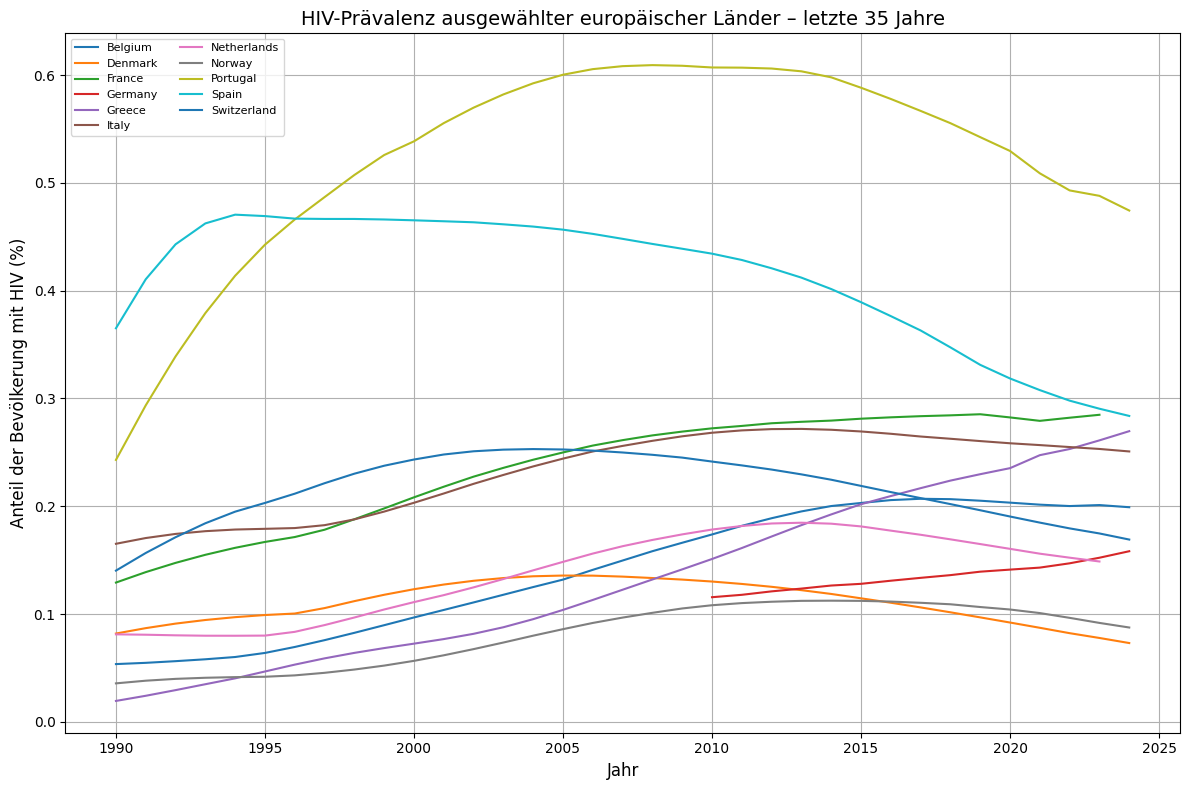

Anzahl Länder: 11
Anzahl Jahre: 35


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]
df = df[df["Entity"].isin(selected_countries)]
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)
plt.figure(figsize=(12,8))
for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anteil der Bevölkerung mit HIV (%)", fontsize=12)
plt.title("HIV-Prävalenz ausgewählter europäischer Länder – letzte 35 Jahre", fontsize=14)
plt.legend(fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
import pandas as pd
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]
df = df[df["Entity"].isin(selected_countries)]
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
hiv_col = hiv_col[0]
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)
num_countries = pivot_df.shape[0]
num_years = pivot_df.shape[1]
num_data_points = pivot_df.count().sum() 
print(f"Anzahl Länder: {num_countries}")
print(f"Anzahl Jahre: {num_years}")



Die Grafik zeigt die zeitliche Entwicklung der HIV-Prävalenz in ausgewählten europäischen Ländern im Zeitraum von 1990 bis 2024. Die X-Achse bildet den zeitlichen Verlauf ab, während auf der Y-Achse die HIV-Prävalenz in Prozent dargestellt ist.
Insgesamt lässt sich über viele Länder hinweg ein Anstieg der HIV-Prävalenz von den frühen 1990er-Jahren bis in die frühen 2010er-Jahre beobachten. Ab den 2010er-Jahren zeigt sich in den meisten Ländern eine Stagnation oder ein allmählicher Rückgang der Prävalenzwerte.

Diese Entwicklung kann unter anderem auf verbesserte Präventionsmaßnahmen, eine frühere und genauere Diagnostik sowie den Fortschritt in der antiretroviralen Therapie zurückgeführt werden, welche sowohl die Transmission reduzieren als auch die Lebenserwartung HIV-positiver Personen erhöhen.

### Veranschaulichung des Durchschnitts der Infektionsrate ohne spezifische Länderbeschriftung


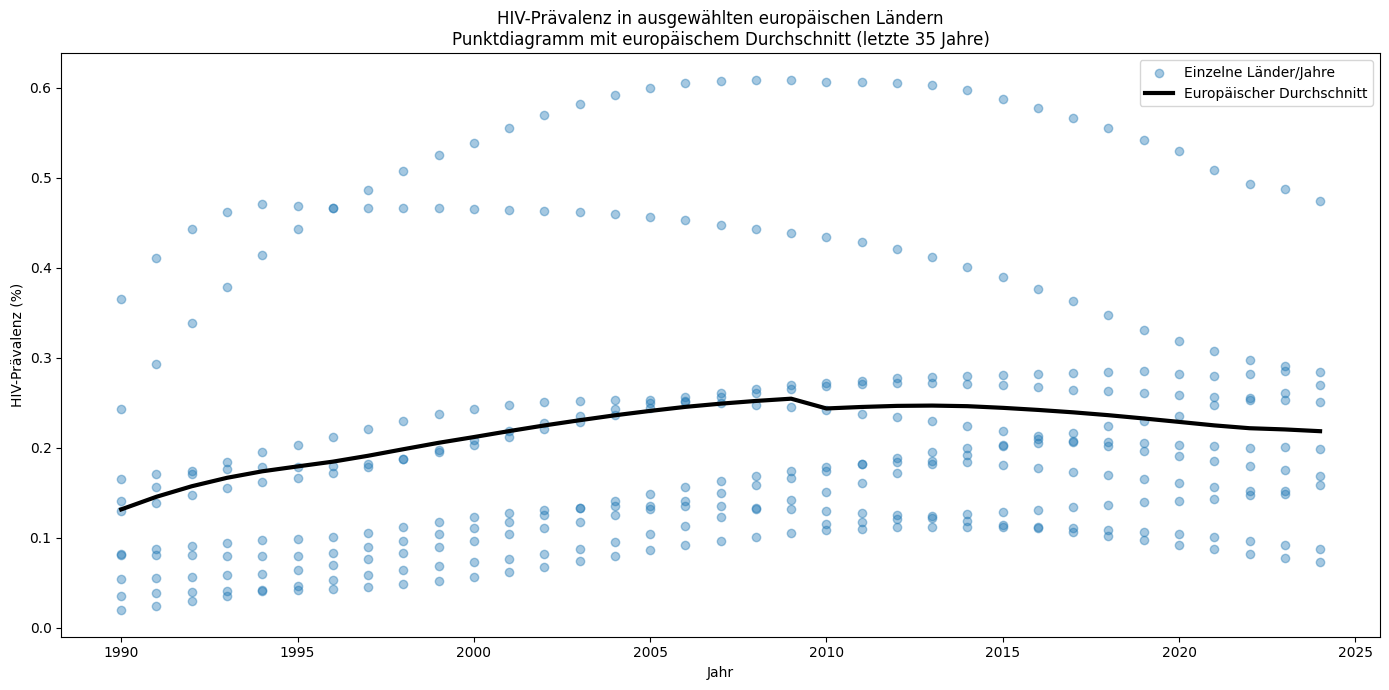

In [140]:

df = df[df["Entity"].isin(selected_countries)]
df = df[df["Year"] >= df["Year"].max() - 35]
hiv_col = [c for c in df.columns if "hiv" in c.lower()][0]
mean_per_year = df.groupby("Year")[hiv_col].mean()
plt.figure(figsize=(14, 7))
plt.scatter(
    df["Year"],
    df[hiv_col],
    alpha=0.4,
    label="Einzelne Länder/Jahre"
)
plt.plot(
    mean_per_year.index,
    mean_per_year.values,
    color="black",
    linewidth=3,
    label="Europäischer Durchschnitt"
)
plt.xlabel("Jahr")
plt.ylabel("HIV-Prävalenz (%)")
plt.title("HIV-Prävalenz in ausgewählten europäischen Ländern\nPunktdiagramm mit europäischem Durchschnitt (letzte 35 Jahre)")
plt.legend()
plt.tight_layout()
plt.show()

----

## 4. Fragestellungen beantoworten



Das Diagramm soll zum Schluss noch untereinander vergleichen und zeigen welches dieser 11 Länder am stärksten/wenigsten betroffen war.

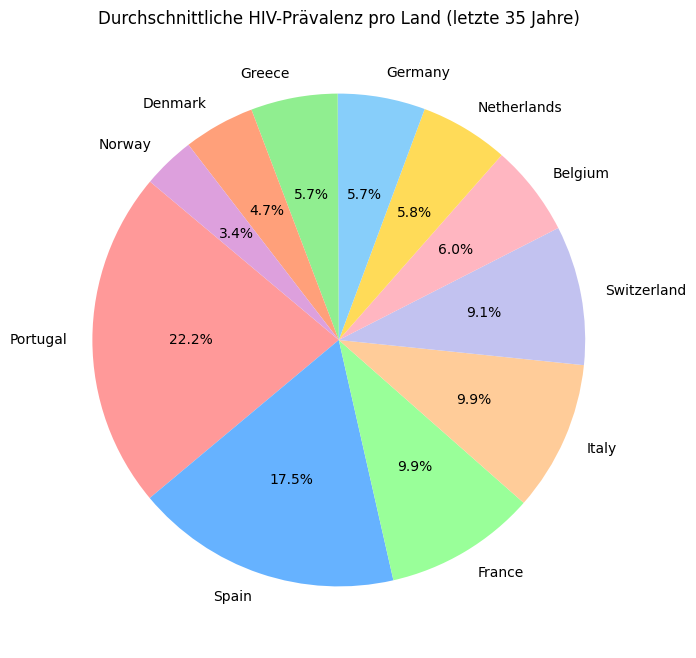

In [141]:
import matplotlib.pyplot as plt
länder = ['Portugal', 'Spain', 'France', 'Italy', 'Switzerland', 
          'Belgium', 'Netherlands', 'Germany', 'Greece', 'Denmark', 'Norway']
prävalenz = [0.522, 0.411, 0.234, 0.232, 0.215, 0.141, 0.137, 0.135, 0.134, 0.110, 0.081]
farben = ['#FF9999','#66B2FF','#99FF99','#FFCC99','#C2C2F0','#FFB6C1',
          '#FFDB58','#87CEFA','#90EE90','#FFA07A','#DDA0DD']
plt.figure(figsize=(8,8))
plt.pie(prävalenz, labels=länder, autopct='%1.1f%%', startangle=140, colors=farben)
plt.title('Durchschnittliche HIV-Prävalenz pro Land (letzte 35 Jahre)')
plt.show()

-----
### Beantworten der Fragestellungen:
1. Wo in Europa waren die meisten Menschen betroffen und warum?

Unter den betrachteten Ländern weist Portugal die höchste HIV-Prävalenz auf. Zu dieser Entwicklung trugen insbesondere eine ausgeprägte Heroin-Epidemie in den 1980er- und 1990er-Jahren sowie eine hohe internationale Mobilität infolge des Tourismus bei. Beide Faktoren begünstigten die Ausbreitung von HIV innerhalb der Bevölkerung.
 
Demgegenüber verzeichnen andere westeuropäische Länder – darunter Spanien, Frankreich, Deutschland und Italien – trotz eines niedrigeren prozentualen Anteils HIV-Infizierter eine höhere absolute Zahl von Menschen mit HIV. Dies ist vor allem auf ihre grössere Einwohnerzahl im Vergleich zu Portugal zurückzuführen. Entsprechend ist die Gesamtzahl der Infizierten höher, obwohl der relative Bevölkerungsanteil geringer ausfällt.

2. Ab wann konnten die Ansteckungen reduziert werden und wie?

Insgesamt lässt sich anhand der Grafiken erkennen, dass die HIV-Prävalenz in den 1990er-Jahren deutlich ansteigt, in den 2000er- bis frühen 2010er-Jahren ein Plateau beziehungsweise einen Höhepunkt erreicht und ab den 2010er-Jahren wieder abnimmt. Dieser zeitliche Verlauf lässt sich durch mehrere epidemiologischen und medizinischen Entwicklungen erklären.
 
Ein wesentlicher Faktor ist die kontinuierliche Verbesserung antiretroviraler Therapien. Insbesondere die Einführung und Weiterentwicklung von Kombinationstherapien führte zu einer deutlichen Reduktion der Viruslast bei behandelten Personen. Dadurch konnten Neuansteckungen erheblich minimiert werden, da Menschen mit erfolgreicher Therapie heute als kaum oder nicht infektiös gelten.
 
Darüber hinaus wurden Präventionsmassnahmen im Verlauf der Zeit deutlich ausgebaut und optimiert. Dazu zählen unter anderem Safe-Sex-Kampagnen, Spritzenaustauschprogramme sowie Substitutionsprogramme für Menschen mit Drogenabhängigkeit. Diese Massnahmen trugen wesentlich dazu bei, zentrale Übertragungswege zu unterbrechen und die weitere Ausbreitung von HIV einzudämmen.
